### Giovanni Trappolini
Research for RAG

Contact: trapponili@diag.uniroma1.it

### Schedule
6-9PM

### Program

**Theoric Basics**
- Linear regression
- Logistic regression
- MLP: Multilayer Perceptron / Backpropagation

**Language Modeling I**

**Language Modeling II**

**Transformers**
- BERT
- GPT
**Advanced Concepts**

Breaks and interactiveness will be part of the course

**Exam**

Multiple Choice


---

# Lecture 1

## Basics

### Linear Regression

It's the basic building block of any moderm machine learning system.
It's the linnear aproximation for a dataset with 2 variables
We use this because we want it at inference.

$ y = ax + b$ 
$ y = ax_1 + bx_2 + cx_1 x_2$

How do I choose the line? 
The line (model) minimize the **loss function**. One popular loss function is **MSE: Mean Squared Error**

You can find the best line by
- Calculate the exact solution by finding the derivative of the loss function
- Use grandient descent (this is more used in ML)

### Exact Solution Method
After this we compute the second layer.
N: how many people

$Y$ is $N*1$ What is their income
$X$ is $N*K$ with K the number of variables. What is their data
$B$ is $N*1$ with our model

$Y = XB$

$L  = (Y-XB)^T (Y - XB)$

$L = Y^T Y - Y^TXB - B^TX^TY + B^TX^TXB$

$dL/dB = 0$

$B = (X^T X)^{-1}X^T Y$

Here we have a problem, if we need the inverse, we will have problems if we have two variables (columns) too much similar. That's a reason why this technique is not used.

Also, as we have the product $X^T Y$, our $B$ will be too much determined by the correlation between the $X$ and $Y$.

### Gradient Descent Method

$ y = ax + b$

$L = 1/2*{\displaystyle\sum_{j=1}^N (y -(ax + b))^2}$ we know this function is **convex**, that tell's us that if we have a local minimum, it is a global minimum. This is not common in real world problems.

We want to find that minimum, by directing to the minus gradient (the direction of maximum decrease of the loss function).

$dL/da = (-x)(y-ax-b)$

$dL/db = (-1)(y-ax-b)$

This is an **iterative** procedure 

$a_{t+1} = a_t - LR(dL/da) $
$b_{t+1} = b_t - LR(dL/db) $

Where R is the **learning rate**, it can be variable.

As we don't have the entire population of data, we don't want the exact solution of the problem, that's called **overfitting**

---
Let's begin with the code. We will use Pytorch framework from Meta.

### Tensors

In [2]:
import torch

data = [[1, 2], [3, 4]]
tensor = torch.tensor(data, dtype=torch.float32)
tensor

tensor([[1, 2],
        [3, 4]])

### Bias-Variance Trade-Off

Total error = Bias + Variance + noise (uncontrollable variable)

**Bias**, how much error there is in where you are aiming
**Variance**, how much error there is in the data

You want to aim to an intermediate point between this two extremes.

- The more complex is the model, the more error new variance will make.
- The more simple is the model, the more bias the model will have. 

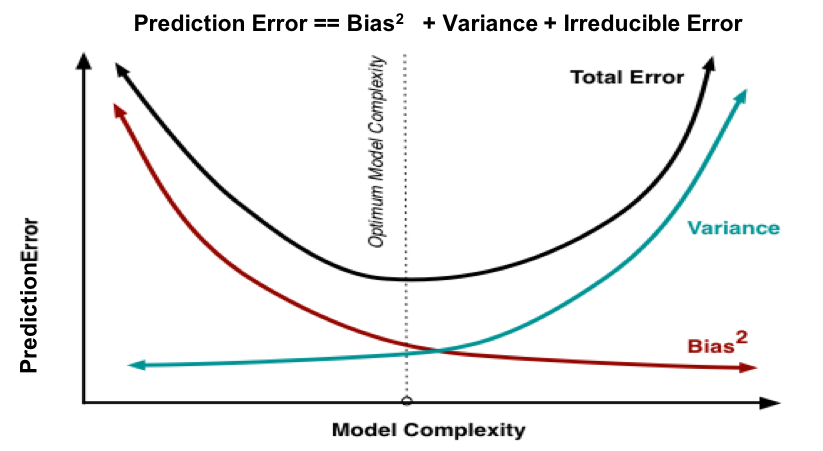

This is for classical machine learning. In theory, this is correct for deep learning too, but there's actually a difference here.

**Doble descent**

We can see how with more training and complexity, after overfitting (it seems also adding more parameters), you get a really big reduction in the error.


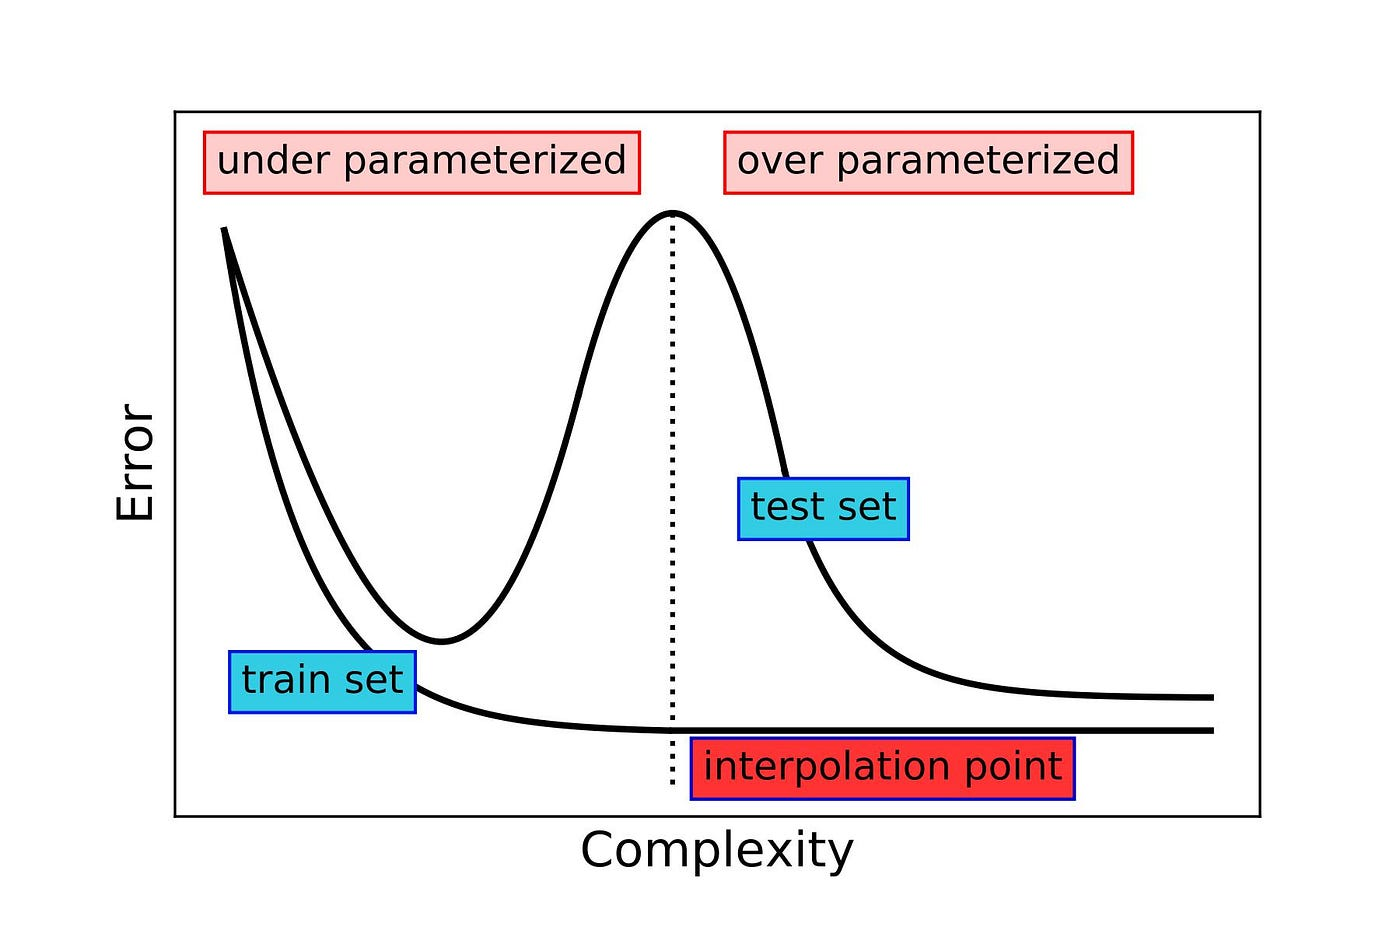

---

# Lecture 2: Logistic Regression

### Regularization

We have to paradigms: Ridge (norm 2) and Lasso (1 norm)

We add a component to Loss Function

$ L = 1/2 (Y - \hat Y)^2 + λ||B||^2$

Where λ is the hyper-parameter selected by training, this new component, penalisize the complexity of the model

### Clasification (not regression)

$f : R → {{0 ,1 }}$

Here we want to find a line that splits the data in two with the best precision

Our prior model was a scalar, now we want a 0 or a 1. We can use the **Sigmoid** function to get that result from the scalar.

To select a label form the function, we set a treshold.

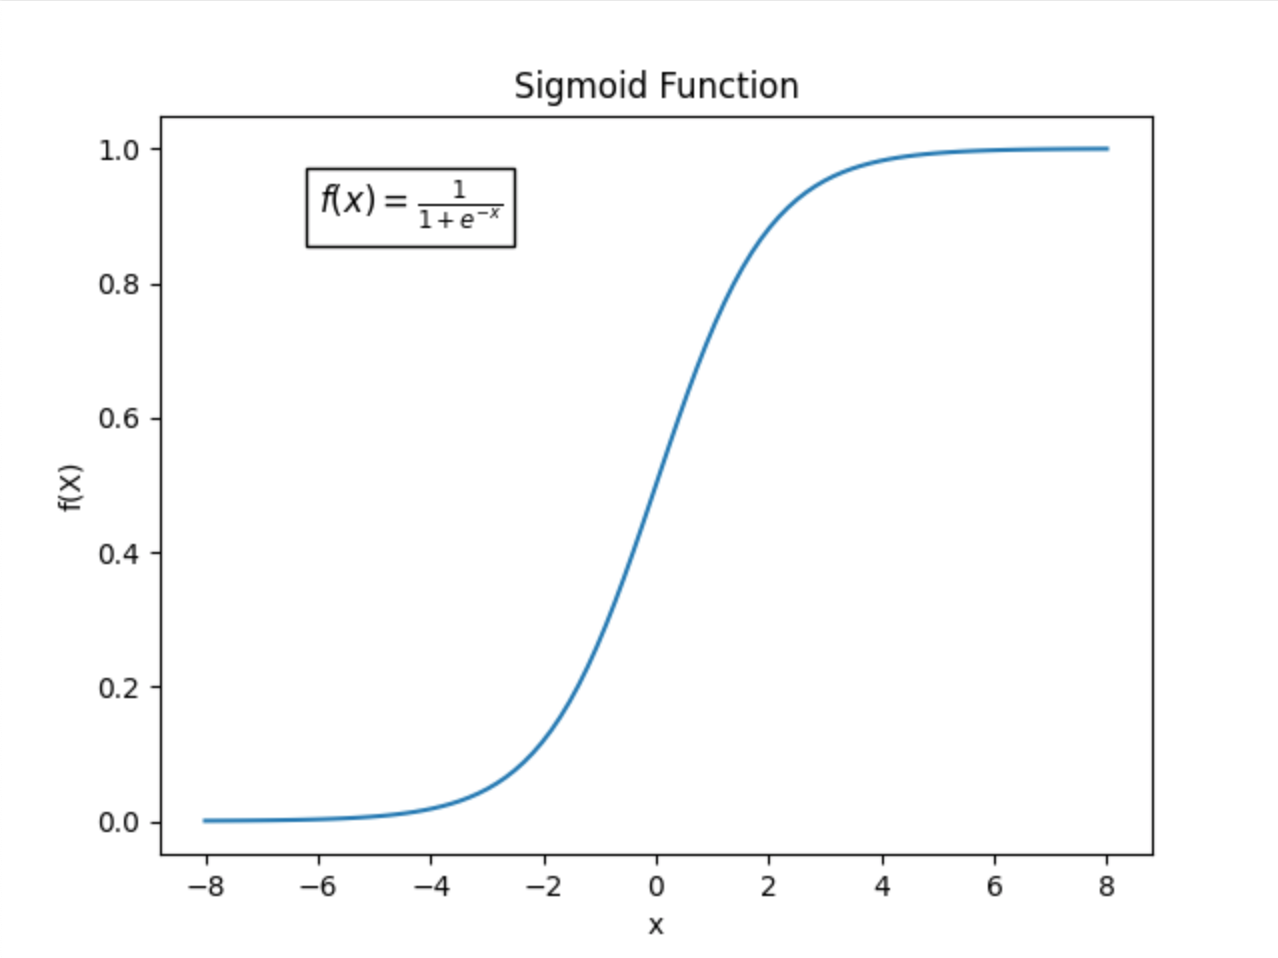

### Loss function

The new loss function will be this one:

(Cross Entropy)

$CE = J(Q) = {\displaystyle\sum_{i=1}^N [(-y_i) (log(\hat y_i))+(1-y_i)log(1-\hat y_i)]}$

### From Logistic Regression to Machine Learning Progremming

$y = \sigma (W_1 x_1 + W_2 x_2)$ (sigmoid function)

### Graphical representation

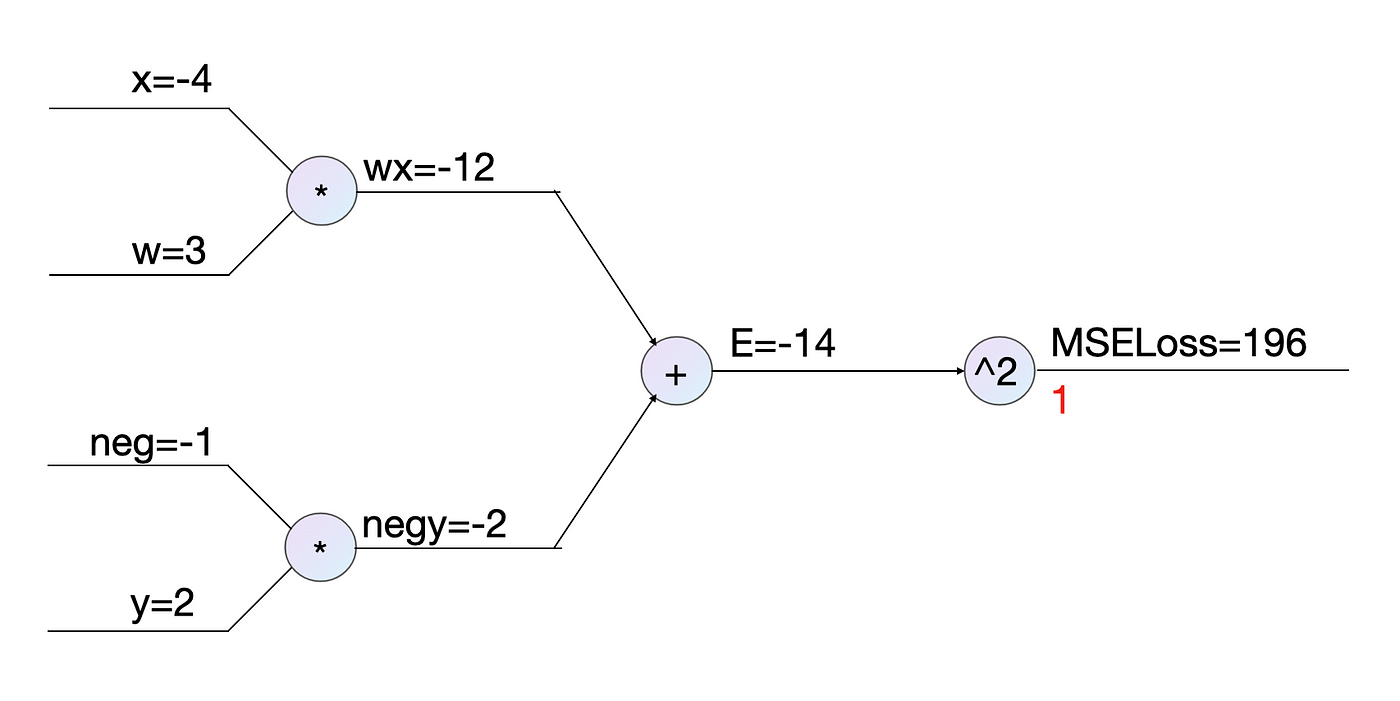

**This is often known as perceptron**

### Growing the sctructure

We can add more weights from the same data, then sum all of them and finally apply the $\sigma$ function

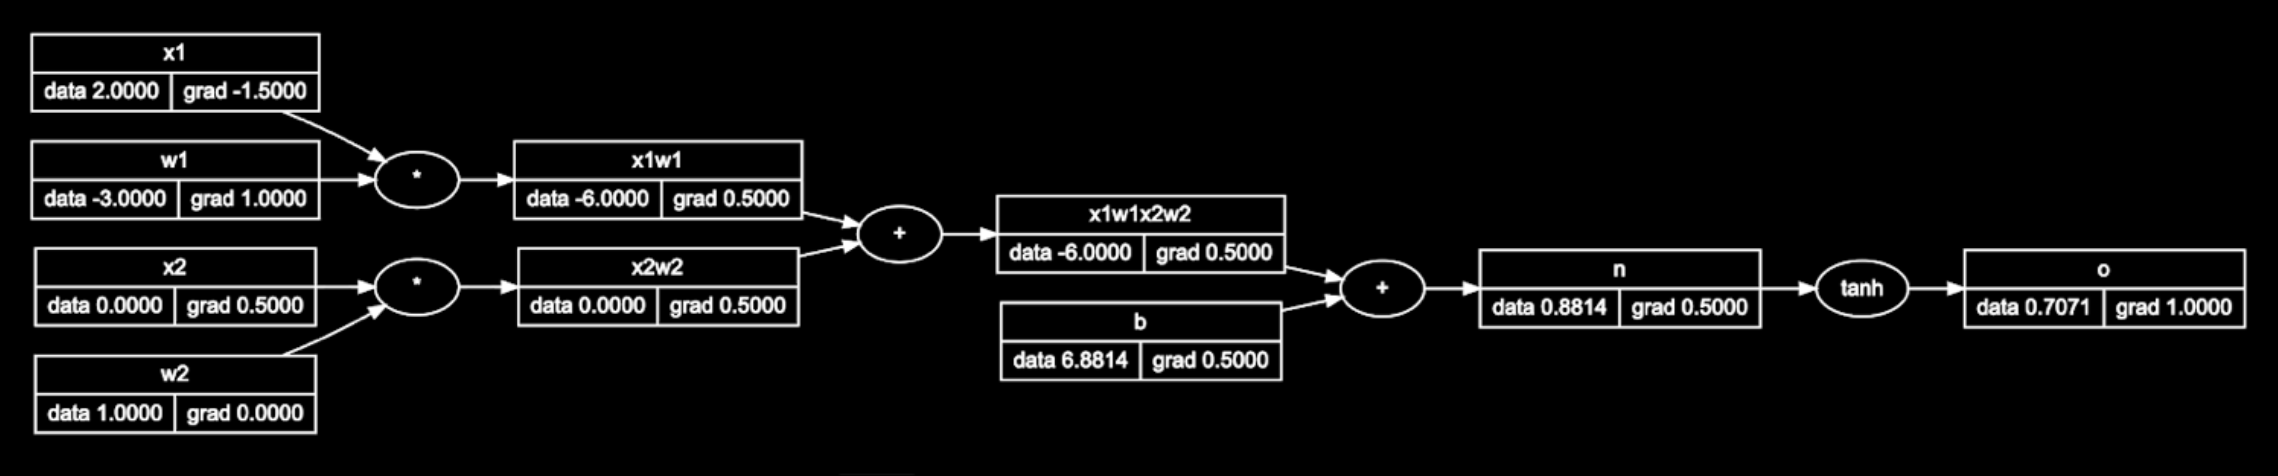

### Matrix Form

$Y = \sigma(X(nxk)W(kx1))$

But for more layers we have

$Y = \sigma[\sigma(X(nxk)W(kx1)) W']$

Where we have to apply the non linearity each time, because if it wasn't there, wwe would have a linear combination only.

We use these new layers because here we are increasing the dimension of the data, and we hope that in this new higher dimension, we can separate the data in an easier manner.

---

### We cannot learn: Hyper-Parameters

- How many hidden layers?
- How many neurons in each hidden layer?
- What activation function should I use?

There's a lot of research trying to explain the correct answers for these ones but there's no consensus. Big companies find a lot of better outcomes because they can train a lot of models with different hyper-parameters.

### We can learn

- How to set the correct parameters.

We will do this by using **automatic differentiation**, i.e., automating the process we learned before. To implement this, we need to know about **computational graphs**.

## Computational Graphs

$Z = log(3x^2 + 5xy)$

We can represent any arbitrary function with computational graphs.

Getting the result of Z from x and y is the forward pass.

We want $dZ/dx$ 

$a = x^2$

$b = 3a$

$c = xy$

$d = 5c$

$e = b+d$

$Z = log(e)$

Then we have 

$dZ/dx = dZ/de * de/dx = dZ/de * [de/db*db/dx + de/dd*dd/dx] = $ ... 

$... = 1/e[1*3*2x + 1*5*y] = (6x+5y)/(3x^2+5xy)$

This is **backward-propagation**. We can calculate how each parameter affects the output and update them accordingly to minimize the error. This method ensures that each parameter adjustment is informed by its contribution to the overall error, leading to more efficient learning.

### Stochastic Gradient Descent

200 data points

Blocks of 50 data points, an EPOCH is 4 iterations on a block like this. Stochastic Gradient Descent (SGD) updates the model parameters for each batch of data, providing faster updates and better convergence. By working on smaller batches, SGD can escape local minima and find better solutions.

### ADAM

It's like stochastic gradient descent but preserves momentum. You combine the previous direction with the new gradient direction, smoothing out updates. This helps in finding a better path to the minimum and speeds up convergence. ADAM adjusts the learning rate for each parameter, making it more robust to noisy gradients and leading to quicker convergence.

ADAM is the actual system used in practice.

### Residual Layers

The model gets too unstable. Adding previous layers to the next layers by skipping some provides more structure and stability. This technique, known as residual connections, helps in training deeper networks effectively. Residual layers allow gradients to flow through the network more smoothly, preventing the vanishing gradient problem and enabling the training of very deep networks.

